In [12]:
import pandas as pd
import numpy as np
from gensim import corpora
import gensim
import pickle
import pyLDAvis.gensim
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [13]:
# Coherence values 계산
def compute_coherence_values(dictionary, corpus, text, limit, start=2, step=3): 
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step): 
        print(num_topics)
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_topics, id2word=dictionary, passes=30)
        coherence_model_lda = gensim.models.CoherenceModel(model=model, texts=text, dictionary=dictionary, coherence='c_v')
        model_list.append(model) 
        coherence_values.append(coherence_model_lda.get_coherence())   
    return model_list, coherence_values 

In [14]:
# Coherence score 별 토픽 갯수 확인
def find_optimal_number_of_topics(dictionary, corpus, text): 
    limit = 100; 
    start = 10; 
    step = 10; 
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, text=text, start=start, limit=limit, step=step) 
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score") 
    plt.legend(("coherence_values"), loc='best') 
    plt.show()

In [15]:
# 가장 성능이 좋은 모델 선택
def selecte_model(model_list, coherence_values):
    tmp_c = 0
    index = 0
    for i in range(len(coherence_values)):
        print(coherence_values[i])
        if tmp_c < coherence_values[i]:
            tmp_c = coherence_values[i]
            index = i
    return model_list[index]

In [16]:
# 사용자의 영화 평점 정보 불러오기
movie_data = pd.read_csv('./files/pre-data/u.data', sep='|')
movie_data.columns = ['user_id', 'movie_id', 'rating', 'time']
sMovie_data = movie_data.sort_values(by='user_id')
nMovie_data = np.array(sMovie_data)

In [17]:
# 토픽(사용자)별 단어 집합 만들기
# 사용자별로 movie * rating으로 영화의 빈도를 조정한다.
c = nMovie_data[0][0]
topic = []
topics_c = []
for i in range(len(nMovie_data)):
    rc = nMovie_data[i][0]
    if c != rc :
        c = rc
        topics_c.append(topic)
        topic = []
    if i == len(nMovie_data)-1:
        topics_c.append(topic)
    rt = nMovie_data[i][2]
    for j in range(rt):
        topic.append(str(nMovie_data[i][1])+'movie')
    

In [18]:
# 단어 사전 만들기
dictionary = corpora.Dictionary(topics_c)
corpus = [dictionary.doc2bow(text) for text in topics_c]
dictionary.save_as_text('./files/dictionary')
pickle.dump(corpus, open("./files/corpus", "wb"))

In [19]:
# 검사하고자 할 토픽의 범위 지정
limit = 100; 
start = 10; 
step = 3; 
#find_optimal_number_of_topics(dictionary=dictionary, corpus=corpus, text=topics_c)
# model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, text=topics_c, start=start, limit=limit, step=step) 
#가장 좋은 모델 선택
#ldamodel = selecte_model(model_list, coherence_values)

In [20]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 60, id2word=dictionary, passes=15)

In [21]:
# 토픽 확인
topics = ldamodel.print_topics(60, num_words=5)
for topic in topics:
    print(topic)

(0, '0.014*"1014movie" + 0.013*"588movie" + 0.012*"742movie" + 0.011*"155movie" + 0.011*"1016movie"')
(1, '0.005*"763movie" + 0.005*"721movie" + 0.005*"12movie" + 0.005*"780movie" + 0.005*"67movie"')
(2, '0.010*"151movie" + 0.009*"588movie" + 0.009*"473movie" + 0.008*"178movie" + 0.008*"1060movie"')
(3, '0.006*"11movie" + 0.006*"203movie" + 0.006*"55movie" + 0.006*"160movie" + 0.005*"92movie"')
(4, '0.016*"480movie" + 0.015*"174movie" + 0.013*"748movie" + 0.012*"50movie" + 0.012*"250movie"')
(5, '0.017*"12movie" + 0.015*"23movie" + 0.012*"64movie" + 0.012*"182movie" + 0.012*"192movie"')
(6, '0.040*"300movie" + 0.033*"294movie" + 0.030*"258movie" + 0.029*"328movie" + 0.028*"288movie"')
(7, '0.018*"204movie" + 0.017*"174movie" + 0.017*"173movie" + 0.017*"172movie" + 0.017*"486movie"')
(8, '0.017*"182movie" + 0.015*"302movie" + 0.015*"79movie" + 0.013*"187movie" + 0.013*"12movie"')
(9, '0.062*"603movie" + 0.047*"525movie" + 0.030*"12movie" + 0.028*"923movie" + 0.026*"340movie"')
(10, '0.0

In [22]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [23]:
#4) 문서 별 토픽 분포 보기

for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

#def make_topictable_per_doc(ldamodel, corpus, texts):
topic_table = pd.DataFrame()
texts = topics

#print(corpus[:2]) #[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 4), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)], [(52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]]
#print(ldamodel[corpus][:2]) #<gensim.interfaces.TransformedCorpus object at 0x7fed1abf9898>
#print(len(ldamodel[corpus])) #11314

# 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
for i, topic_list in enumerate(ldamodel[corpus]):
    print(topic_list) #[(0, 0.49480823), (3, 0.042265743), (16, 0.3513999), (17, 0.0986229)]
    doc = topic_list[0] if ldamodel.per_word_topics else topic_list 
    print(doc) #[(0, 0.49480823), (3, 0.042265743), (16, 0.3513999), (17, 0.0986229)] 
    # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
    # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
    # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
    # 48 > 25 > 21 > 5 순으로 정렬이 된 것.
    doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
    print(doc) #[(0, 0.49480823), (16, 0.3513999), (17, 0.0986229), (3, 0.042265743)]

    # 모든 문서에 대해서 각각 아래를 수행
    for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
        if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
            wp = ldamodel.show_topic(topic_num)
            topic_keywords = ", ".join([word for word, prop in wp])         
            print(int(topic_num), round(prop_topic, 4), topic_list, topic_keywords) #15 0.3419 [(5, 0.14677979), (11, 0.1351353), (15, 0.34185725), (16, 0.2243457), (17, 0.1397852)] people, christian, many, church, also, christians, religion, world, believe, would
            topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list, topic_keywords]), ignore_index=True)
            # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
        else:
            break
#return(topic_table)

#topictable = make_topictable_per_doc(ldamodel, corpus, tokenized_doc)
topic_table = topic_table.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topic_table.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중', 'topic_keywords']
topic_table[:10]

0 번째 문서의 topic 비율은 [(0, 0.017850958), (5, 0.041956987), (15, 0.011840943), (16, 0.19604468), (28, 0.012990046), (29, 0.054334395), (32, 0.38667822), (43, 0.014748868), (46, 0.019256376), (51, 0.19196288), (57, 0.04288368)]
1 번째 문서의 topic 비율은 [(6, 0.050233167), (31, 0.18755491), (34, 0.04163249), (45, 0.23851703), (57, 0.47809395)]
2 번째 문서의 topic 비율은 [(6, 0.29665288), (31, 0.3627469), (53, 0.33435002)]
3 번째 문서의 topic 비율은 [(6, 0.8100926), (15, 0.032089483), (28, 0.14876984)]
4 번째 문서의 topic 비율은 [(36, 0.113690145), (40, 0.8219049), (55, 0.052516047), (56, 0.010036864)]
[(0, 0.017987728), (5, 0.043622684), (16, 0.20014922), (29, 0.054274615), (32, 0.38646236), (43, 0.017960727), (46, 0.016461259), (51, 0.19176789), (57, 0.042532034)]
[(0, 0.017987728), (5, 0.043622684), (16, 0.20014922), (29, 0.054274615), (32, 0.38646236), (43, 0.017960727), (46, 0.016461259), (51, 0.19176789), (57, 0.042532034)]
[(32, 0.38646236), (16, 0.20014922), (51, 0.19176789), (29, 0.054274615), (5, 0.043622684), (5

[(38, 0.2722977), (39, 0.18818617), (57, 0.52846944)]
[(38, 0.2722977), (39, 0.18818617), (57, 0.52846944)]
[(57, 0.52846944), (38, 0.2722977), (39, 0.18818617)]
57 0.5285 [(38, 0.2722977), (39, 0.18818617), (57, 0.52846944)] 100movie, 285movie, 286movie, 124movie, 9movie, 276movie, 275movie, 14movie, 127movie, 137movie
[(14, 0.017023757), (17, 0.055600166), (26, 0.39719367), (44, 0.13226672), (47, 0.36932743), (48, 0.02368389)]
[(14, 0.017023757), (17, 0.055600166), (26, 0.39719367), (44, 0.13226672), (47, 0.36932743), (48, 0.02368389)]
[(26, 0.39719367), (47, 0.36932743), (44, 0.13226672), (17, 0.055600166), (48, 0.02368389), (14, 0.017023757)]
26 0.3972 [(14, 0.017023757), (17, 0.055600166), (26, 0.39719367), (44, 0.13226672), (47, 0.36932743), (48, 0.02368389)] 165movie, 207movie, 513movie, 83movie, 512movie, 59movie, 170movie, 60movie, 86movie, 511movie
[(6, 0.39778972), (33, 0.588784)]
[(6, 0.39778972), (33, 0.588784)]
[(33, 0.588784), (6, 0.39778972)]
33 0.5888 [(6, 0.39778972),

[(6, 0.09211545), (13, 0.30214044), (27, 0.60195905)]
[(6, 0.09211545), (13, 0.30214044), (27, 0.60195905)]
[(27, 0.60195905), (13, 0.30214044), (6, 0.09211545)]
27 0.602 [(6, 0.09211545), (13, 0.30214044), (27, 0.60195905)] 483movie, 98movie, 357movie, 187movie, 100movie, 127movie, 514movie, 523movie, 50movie, 654movie
[(2, 0.9982986)]
[(2, 0.9982986)]
[(2, 0.9982986)]
2 0.9983 [(2, 0.9982986)] 151movie, 588movie, 473movie, 178movie, 1060movie, 99movie, 283movie, 143movie, 133movie, 652movie
[(57, 0.72663385), (59, 0.26212552)]
[(57, 0.72663385), (59, 0.26212552)]
[(57, 0.72663385), (59, 0.26212552)]
57 0.7266 [(57, 0.72663385), (59, 0.26212552)] 100movie, 285movie, 286movie, 124movie, 9movie, 276movie, 275movie, 14movie, 127movie, 137movie
[(28, 0.57045877), (43, 0.41789415)]
[(28, 0.57045877), (43, 0.41789415)]
[(28, 0.57045877), (43, 0.41789415)]
28 0.5705 [(28, 0.57045877), (43, 0.41789415)] 50movie, 64movie, 98movie, 56movie, 174movie, 181movie, 172movie, 173movie, 318movie, 357m

38 0.319 [(28, 0.26799673), (34, 0.302227), (38, 0.31904322), (57, 0.10701445)] 50movie, 117movie, 181movie, 121movie, 1movie, 257movie, 405movie, 222movie, 7movie, 151movie
[(20, 0.034960523), (40, 0.9553795)]
[(20, 0.034960523), (40, 0.9553795)]
[(40, 0.9553795), (20, 0.034960523)]
40 0.9554 [(20, 0.034960523), (40, 0.9553795)] 228movie, 181movie, 172movie, 230movie, 174movie, 208movie, 432movie, 50movie, 210movie, 431movie
[(10, 0.09395544), (27, 0.8133315), (57, 0.08616105)]
[(10, 0.09395544), (27, 0.8133315), (57, 0.08616105)]
[(27, 0.8133315), (10, 0.09395544), (57, 0.08616105)]
27 0.8133 [(10, 0.09395544), (27, 0.8133315), (57, 0.08616105)] 483movie, 98movie, 357movie, 187movie, 100movie, 127movie, 514movie, 523movie, 50movie, 654movie
[(5, 0.45501158), (7, 0.025854131), (15, 0.05111037), (18, 0.09792377), (19, 0.12519582), (43, 0.17029798), (45, 0.04977881), (47, 0.02285956)]
[(5, 0.45501158), (7, 0.025854131), (15, 0.05111037), (18, 0.09792377), (19, 0.12519582), (43, 0.170297

[(38, 0.2653853), (45, 0.6518154), (57, 0.06882843)]
[(38, 0.2653853), (45, 0.6518154), (57, 0.06882843)]
[(45, 0.6518154), (38, 0.2653853), (57, 0.06882843)]
45 0.6518 [(38, 0.2653853), (45, 0.6518154), (57, 0.06882843)] 237movie, 282movie, 471movie, 476movie, 255movie, 274movie, 25movie, 111movie, 15movie, 742movie
[(1, 0.34736025), (3, 0.13724008), (5, 0.099039555), (17, 0.014064716), (18, 0.012099144), (30, 0.024602918), (32, 0.3084791), (37, 0.048346058)]
[(1, 0.34736025), (3, 0.13724008), (5, 0.099039555), (17, 0.014064716), (18, 0.012099144), (30, 0.024602918), (32, 0.3084791), (37, 0.048346058)]
[(1, 0.34736025), (32, 0.3084791), (3, 0.13724008), (5, 0.099039555), (37, 0.048346058), (30, 0.024602918), (17, 0.014064716), (18, 0.012099144)]
1 0.3474 [(1, 0.34736025), (3, 0.13724008), (5, 0.099039555), (17, 0.014064716), (18, 0.012099144), (30, 0.024602918), (32, 0.3084791), (37, 0.048346058)] 763movie, 721movie, 12movie, 780movie, 67movie, 42movie, 11movie, 69movie, 156movie, 246

[(27, 0.40615496), (29, 0.29404047), (38, 0.23474479), (45, 0.061577085)]
[(27, 0.40615496), (29, 0.29404047), (38, 0.23474479), (45, 0.061577085)]
[(27, 0.40615496), (29, 0.29404047), (38, 0.23474479), (45, 0.061577085)]
27 0.4062 [(27, 0.40615496), (29, 0.29404047), (38, 0.23474479), (45, 0.061577085)] 483movie, 98movie, 357movie, 187movie, 100movie, 127movie, 514movie, 523movie, 50movie, 654movie
[(26, 0.9952303)]
[(26, 0.9952303)]
[(26, 0.9952303)]
26 0.9952 [(26, 0.9952303)] 165movie, 207movie, 513movie, 83movie, 512movie, 59movie, 170movie, 60movie, 86movie, 511movie
[(27, 0.7120665), (47, 0.11474422), (57, 0.16864362)]
[(27, 0.7120665), (47, 0.11474422), (57, 0.16864362)]
[(27, 0.7120665), (57, 0.16864362), (47, 0.11474422)]
27 0.7121 [(27, 0.7120665), (47, 0.11474422), (57, 0.16864362)] 483movie, 98movie, 357movie, 187movie, 100movie, 127movie, 514movie, 523movie, 50movie, 654movie
[(12, 0.03042142), (19, 0.21916105), (28, 0.05402583), (46, 0.68541104)]
[(12, 0.03042142), (19, 

[(27, 0.058688834), (44, 0.93760735)]
[(27, 0.058688834), (44, 0.93760735)]
[(44, 0.93760735), (27, 0.058688834)]
44 0.9376 [(27, 0.058688834), (44, 0.93760735)] 71movie, 318movie, 69movie, 95movie, 70movie, 275movie, 1movie, 28movie, 216movie, 223movie
[(6, 0.15253033), (31, 0.72160476), (53, 0.11681711)]
[(6, 0.15253033), (31, 0.72160476), (53, 0.11681711)]
[(31, 0.72160476), (6, 0.15253033), (53, 0.11681711)]
31 0.7216 [(6, 0.15253033), (31, 0.72160476), (53, 0.11681711)] 272movie, 315movie, 313movie, 302movie, 316movie, 347movie, 750movie, 269movie, 340movie, 346movie
[(38, 0.5058057), (57, 0.48639846)]
[(38, 0.5058057), (57, 0.48639846)]
[(38, 0.5058057), (57, 0.48639846)]
38 0.5058 [(38, 0.5058057), (57, 0.48639846)] 50movie, 117movie, 181movie, 121movie, 1movie, 257movie, 405movie, 222movie, 7movie, 151movie
[(3, 0.03696445), (7, 0.023385467), (14, 0.09568644), (17, 0.013801556), (18, 0.12346635), (20, 0.017426413), (26, 0.025610156), (44, 0.021778498), (47, 0.59388494), (51, 0.

[(1, 0.028934117), (6, 0.050270062), (15, 0.06270525), (17, 0.058438558), (19, 0.1192486), (35, 0.06639846), (43, 0.086810306), (44, 0.022577085), (45, 0.21871305), (46, 0.15143801), (52, 0.12716565)]
[(1, 0.028934117), (6, 0.050270062), (15, 0.06270525), (17, 0.058438558), (19, 0.1192486), (35, 0.06639846), (43, 0.086810306), (44, 0.022577085), (45, 0.21871305), (46, 0.15143801), (52, 0.12716565)]
[(45, 0.21871305), (46, 0.15143801), (52, 0.12716565), (19, 0.1192486), (43, 0.086810306), (35, 0.06639846), (15, 0.06270525), (17, 0.058438558), (6, 0.050270062), (1, 0.028934117), (44, 0.022577085)]
45 0.2187 [(1, 0.028934117), (6, 0.050270062), (15, 0.06270525), (17, 0.058438558), (19, 0.1192486), (35, 0.06639846), (43, 0.086810306), (44, 0.022577085), (45, 0.21871305), (46, 0.15143801), (52, 0.12716565)] 237movie, 282movie, 471movie, 476movie, 255movie, 274movie, 25movie, 111movie, 15movie, 742movie
[(31, 0.992377)]
[(31, 0.992377)]
[(31, 0.992377)]
31 0.9924 [(31, 0.992377)] 272movie, 3

[(19, 0.06477516), (30, 0.029161725), (38, 0.06087821), (40, 0.7089675), (44, 0.10115227), (45, 0.031682108)]
[(19, 0.06477516), (30, 0.029161725), (38, 0.06087821), (40, 0.7089675), (44, 0.10115227), (45, 0.031682108)]
[(40, 0.7089675), (44, 0.10115227), (19, 0.06477516), (38, 0.06087821), (45, 0.031682108), (30, 0.029161725)]
40 0.709 [(19, 0.06477516), (30, 0.029161725), (38, 0.06087821), (40, 0.7089675), (44, 0.10115227), (45, 0.031682108)] 228movie, 181movie, 172movie, 230movie, 174movie, 208movie, 432movie, 50movie, 210movie, 431movie
[(3, 0.8122724), (5, 0.025496794), (19, 0.017825529), (55, 0.09274928), (57, 0.03859589)]
[(3, 0.8122724), (5, 0.025496794), (19, 0.017825529), (55, 0.09274928), (57, 0.03859589)]
[(3, 0.8122724), (55, 0.09274928), (57, 0.03859589), (5, 0.025496794), (19, 0.017825529)]
3 0.8123 [(3, 0.8122724), (5, 0.025496794), (19, 0.017825529), (55, 0.09274928), (57, 0.03859589)] 11movie, 203movie, 55movie, 160movie, 92movie, 475movie, 173movie, 56movie, 176movie

[(43, 0.71221715), (44, 0.14349434), (52, 0.13838443)]
[(43, 0.71221715), (44, 0.14349434), (52, 0.13838443)]
[(43, 0.71221715), (44, 0.14349434), (52, 0.13838443)]
43 0.7122 [(43, 0.71221715), (44, 0.14349434), (52, 0.13838443)] 98movie, 174movie, 69movie, 496movie, 423movie, 97movie, 210movie, 50movie, 172movie, 132movie
[(45, 0.987393)]
[(45, 0.987393)]
[(45, 0.987393)]
45 0.9874 [(45, 0.987393)] 237movie, 282movie, 471movie, 476movie, 255movie, 274movie, 25movie, 111movie, 15movie, 742movie
[(12, 0.042368304), (13, 0.031932887), (27, 0.87619436), (31, 0.046940193)]
[(12, 0.042368304), (13, 0.031932887), (27, 0.87619436), (31, 0.046940193)]
[(27, 0.87619436), (31, 0.046940193), (12, 0.042368304), (13, 0.031932887)]
27 0.8762 [(12, 0.042368304), (13, 0.031932887), (27, 0.87619436), (31, 0.046940193)] 483movie, 98movie, 357movie, 187movie, 100movie, 127movie, 514movie, 523movie, 50movie, 654movie
[(5, 0.117715664), (27, 0.16468833), (44, 0.41284126), (47, 0.28271684), (56, 0.012795963

[(20, 0.023056876), (30, 0.032327823), (40, 0.8606775), (43, 0.08201717)]
[(20, 0.023056876), (30, 0.032327823), (40, 0.8606775), (43, 0.08201717)]
[(40, 0.8606775), (43, 0.08201717), (30, 0.032327823), (20, 0.023056876)]
40 0.8607 [(20, 0.023056876), (30, 0.032327823), (40, 0.8606775), (43, 0.08201717)] 228movie, 181movie, 172movie, 230movie, 174movie, 208movie, 432movie, 50movie, 210movie, 431movie
[(6, 0.11822278), (38, 0.29606366), (55, 0.5812322)]
[(6, 0.11822278), (38, 0.29606366), (55, 0.5812322)]
[(55, 0.5812322), (38, 0.29606366), (6, 0.11822278)]
55 0.5812 [(6, 0.11822278), (38, 0.29606366), (55, 0.5812322)] 219movie, 98movie, 200movie, 185movie, 234movie, 218movie, 288movie, 447movie, 56movie, 672movie
[(15, 0.34627295), (19, 0.1076542), (22, 0.35040402), (45, 0.19035746)]
[(15, 0.34627295), (19, 0.1076542), (22, 0.35040402), (45, 0.19035746)]
[(22, 0.35040402), (15, 0.34627295), (45, 0.19035746), (19, 0.1076542)]
22 0.3504 [(15, 0.34627295), (19, 0.1076542), (22, 0.35040402

[(1, 0.48603806), (3, 0.16572565), (5, 0.010697306), (15, 0.011852842), (16, 0.09584606), (31, 0.045965955), (37, 0.024788598), (40, 0.070624724), (55, 0.07709884)]
[(1, 0.48603806), (3, 0.16572565), (5, 0.010697306), (15, 0.011852842), (16, 0.09584606), (31, 0.045965955), (37, 0.024788598), (40, 0.070624724), (55, 0.07709884)]
[(1, 0.48603806), (3, 0.16572565), (16, 0.09584606), (55, 0.07709884), (40, 0.070624724), (31, 0.045965955), (37, 0.024788598), (15, 0.011852842), (5, 0.010697306)]
1 0.486 [(1, 0.48603806), (3, 0.16572565), (5, 0.010697306), (15, 0.011852842), (16, 0.09584606), (31, 0.045965955), (37, 0.024788598), (40, 0.070624724), (55, 0.07709884)] 763movie, 721movie, 12movie, 780movie, 67movie, 42movie, 11movie, 69movie, 156movie, 246movie
[(38, 0.40756783), (45, 0.3023581), (57, 0.2850739)]
[(38, 0.40756783), (45, 0.3023581), (57, 0.2850739)]
[(38, 0.40756783), (45, 0.3023581), (57, 0.2850739)]
38 0.4076 [(38, 0.40756783), (45, 0.3023581), (57, 0.2850739)] 50movie, 117movi

[(44, 0.3979123), (38, 0.100130424), (28, 0.090024985), (27, 0.0796174), (16, 0.076282464), (31, 0.061260045), (5, 0.043974873), (57, 0.041717976), (55, 0.039818235), (46, 0.029580796), (36, 0.017724255)]
44 0.3979 [(5, 0.043974873), (16, 0.076282464), (27, 0.0796174), (28, 0.090024985), (31, 0.061260045), (36, 0.017724255), (38, 0.100130424), (44, 0.3979123), (46, 0.029580796), (55, 0.039818235), (57, 0.041717976)] 71movie, 318movie, 69movie, 95movie, 70movie, 275movie, 1movie, 28movie, 216movie, 223movie
[(27, 0.02748395), (30, 0.027847957), (42, 0.09324187), (43, 0.6637918), (44, 0.012678506), (47, 0.16506651)]
[(27, 0.02748395), (30, 0.027847957), (42, 0.09324187), (43, 0.6637918), (44, 0.012678506), (47, 0.16506651)]
[(43, 0.6637918), (47, 0.16506651), (42, 0.09324187), (30, 0.027847957), (27, 0.02748395), (44, 0.012678506)]
43 0.6638 [(27, 0.02748395), (30, 0.027847957), (42, 0.09324187), (43, 0.6637918), (44, 0.012678506), (47, 0.16506651)] 98movie, 174movie, 69movie, 496movie, 

[(1, 0.39498052), (22, 0.47372097), (45, 0.13024516)]
[(1, 0.39498052), (22, 0.47372097), (45, 0.13024516)]
[(22, 0.47372097), (1, 0.39498052), (45, 0.13024516)]
22 0.4737 [(1, 0.39498052), (22, 0.47372097), (45, 0.13024516)] 781movie, 38movie, 728movie, 692movie, 623movie, 756movie, 845movie, 274movie, 66movie, 720movie
[(5, 0.72340524), (36, 0.14389142), (57, 0.12998888)]
[(5, 0.72340524), (36, 0.14389142), (57, 0.12998888)]
[(5, 0.72340524), (36, 0.14389142), (57, 0.12998888)]
5 0.7234 [(5, 0.72340524), (36, 0.14389142), (57, 0.12998888)] 12movie, 23movie, 64movie, 182movie, 192movie, 180movie, 56movie, 318movie, 654movie, 48movie
[(48, 0.9031142), (57, 0.09306481)]
[(48, 0.9031142), (57, 0.09306481)]
[(48, 0.9031142), (57, 0.09306481)]
48 0.9031 [(48, 0.9031142), (57, 0.09306481)] 427movie, 97movie, 64movie, 462movie, 213movie, 215movie, 357movie, 318movie, 132movie, 197movie
[(6, 0.89648384), (53, 0.09127966)]
[(6, 0.89648384), (53, 0.09127966)]
[(6, 0.89648384), (53, 0.09127966)]

[(1, 0.0901838), (38, 0.27481756), (41, 0.61139184), (45, 0.021188486)]
[(1, 0.0901838), (38, 0.27481756), (41, 0.61139184), (45, 0.021188486)]
[(41, 0.61139184), (38, 0.27481756), (1, 0.0901838), (45, 0.021188486)]
41 0.6114 [(1, 0.0901838), (38, 0.27481756), (41, 0.61139184), (45, 0.021188486)] 204movie, 208movie, 194movie, 186movie, 168movie, 216movie, 435movie, 66movie, 238movie, 710movie
[(20, 0.2936034), (38, 0.36181536), (40, 0.33754376)]
[(20, 0.2936034), (38, 0.36181536), (40, 0.33754376)]
[(38, 0.36181536), (40, 0.33754376), (20, 0.2936034)]
38 0.3618 [(20, 0.2936034), (38, 0.36181536), (40, 0.33754376)] 50movie, 117movie, 181movie, 121movie, 1movie, 257movie, 405movie, 222movie, 7movie, 151movie
[(27, 0.083515), (33, 0.05362074), (47, 0.47552738), (48, 0.38423598)]
[(27, 0.083515), (33, 0.05362074), (47, 0.47552738), (48, 0.38423598)]
[(47, 0.47552738), (48, 0.38423598), (27, 0.083515), (33, 0.05362074)]
47 0.4755 [(27, 0.083515), (33, 0.05362074), (47, 0.47552738), (48, 0.3

[(6, 0.5108763), (31, 0.47801244)]
[(6, 0.5108763), (31, 0.47801244)]
[(6, 0.5108763), (31, 0.47801244)]
6 0.5109 [(6, 0.5108763), (31, 0.47801244)] 300movie, 294movie, 258movie, 328movie, 288movie, 313movie, 286movie, 748movie, 333movie, 326movie
[(38, 0.5623288), (45, 0.43460223)]
[(38, 0.5623288), (45, 0.43460223)]
[(38, 0.5623288), (45, 0.43460223)]
38 0.5623 [(38, 0.5623288), (45, 0.43460223)] 50movie, 117movie, 181movie, 121movie, 1movie, 257movie, 405movie, 222movie, 7movie, 151movie
[(29, 0.9938538)]
[(29, 0.9938538)]
[(29, 0.9938538)]
29 0.9939 [(29, 0.9938538)] 86movie, 116movie, 582movie, 275movie, 14movie, 303movie, 286movie, 45movie, 297movie, 137movie
[(6, 0.15114108), (38, 0.83982444)]
[(6, 0.15114108), (38, 0.83982444)]
[(38, 0.83982444), (6, 0.15114108)]
38 0.8398 [(6, 0.15114108), (38, 0.83982444)] 50movie, 117movie, 181movie, 121movie, 1movie, 257movie, 405movie, 222movie, 7movie, 151movie
[(6, 0.03706576), (27, 0.5662851), (29, 0.17295901), (35, 0.17828871), (57, 0.

[(19, 0.05198228), (20, 0.033018343), (27, 0.04415705), (28, 0.019821204), (31, 0.03839455), (32, 0.07999457), (48, 0.73050326)]
[(19, 0.05198228), (20, 0.033018343), (27, 0.04415705), (28, 0.019821204), (31, 0.03839455), (32, 0.07999457), (48, 0.73050326)]
[(48, 0.73050326), (32, 0.07999457), (19, 0.05198228), (27, 0.04415705), (31, 0.03839455), (20, 0.033018343), (28, 0.019821204)]
48 0.7305 [(19, 0.05198228), (20, 0.033018343), (27, 0.04415705), (28, 0.019821204), (31, 0.03839455), (32, 0.07999457), (48, 0.73050326)] 427movie, 97movie, 64movie, 462movie, 213movie, 215movie, 357movie, 318movie, 132movie, 197movie
[(2, 0.9979724)]
[(2, 0.9979724)]
[(2, 0.9979724)]
2 0.998 [(2, 0.9979724)] 151movie, 588movie, 473movie, 178movie, 1060movie, 99movie, 283movie, 143movie, 133movie, 652movie
[(24, 0.93319577), (57, 0.0615788)]
[(24, 0.93319577), (57, 0.0615788)]
[(24, 0.93319577), (57, 0.0615788)]
24 0.9332 [(24, 0.93319577), (57, 0.0615788)] 152movie, 235movie, 61movie, 474movie, 135movie,

[(5, 0.078830995), (12, 0.031142008), (27, 0.16683955), (38, 0.089764625), (45, 0.27221292), (46, 0.16544755), (57, 0.1924414)]
[(5, 0.078830995), (12, 0.031142008), (27, 0.16683955), (38, 0.089764625), (45, 0.27221292), (46, 0.16544755), (57, 0.1924414)]
[(45, 0.27221292), (57, 0.1924414), (27, 0.16683955), (46, 0.16544755), (38, 0.089764625), (5, 0.078830995), (12, 0.031142008)]
45 0.2722 [(5, 0.078830995), (12, 0.031142008), (27, 0.16683955), (38, 0.089764625), (45, 0.27221292), (46, 0.16544755), (57, 0.1924414)] 237movie, 282movie, 471movie, 476movie, 255movie, 274movie, 25movie, 111movie, 15movie, 742movie
[(38, 0.9633878), (45, 0.031386904)]
[(38, 0.9633878), (45, 0.031386904)]
[(38, 0.9633878), (45, 0.031386904)]
38 0.9634 [(38, 0.9633878), (45, 0.031386904)] 50movie, 117movie, 181movie, 121movie, 1movie, 257movie, 405movie, 222movie, 7movie, 151movie
[(6, 0.7911817), (31, 0.1165057), (49, 0.08571508)]
[(6, 0.7911817), (31, 0.1165057), (49, 0.08571508)]
[(6, 0.7911817), (31, 0.1

[(6, 0.036691215), (12, 0.01070718), (19, 0.51290864), (28, 0.11254934), (31, 0.11854807), (37, 0.030891852), (55, 0.16512498)]
[(6, 0.036691215), (12, 0.01070718), (19, 0.51290864), (28, 0.11254934), (31, 0.11854807), (37, 0.030891852), (55, 0.16512498)]
[(19, 0.51290864), (55, 0.16512498), (31, 0.11854807), (28, 0.11254934), (6, 0.036691215), (37, 0.030891852), (12, 0.01070718)]
19 0.5129 [(6, 0.036691215), (12, 0.01070718), (19, 0.51290864), (28, 0.11254934), (31, 0.11854807), (37, 0.030891852), (55, 0.16512498)] 96movie, 174movie, 195movie, 79movie, 22movie, 385movie, 210movie, 89movie, 550movie, 172movie
[(37, 0.090566784), (47, 0.8935982), (50, 0.013386337)]
[(37, 0.090566784), (47, 0.8935982), (50, 0.013386337)]
[(47, 0.8935982), (37, 0.090566784), (50, 0.013386337)]
47 0.8936 [(37, 0.090566784), (47, 0.8935982), (50, 0.013386337)] 482movie, 498movie, 483movie, 705movie, 478movie, 199movie, 480movie, 134movie, 603movie, 661movie
[(6, 0.36513063), (53, 0.6280618)]
[(6, 0.36513063

[(19, 0.09022459), (22, 0.026900837), (26, 0.059706762), (27, 0.043086737), (43, 0.1919134), (47, 0.5813323)]
[(19, 0.09022459), (22, 0.026900837), (26, 0.059706762), (27, 0.043086737), (43, 0.1919134), (47, 0.5813323)]
[(47, 0.5813323), (43, 0.1919134), (19, 0.09022459), (26, 0.059706762), (27, 0.043086737), (22, 0.026900837)]
47 0.5813 [(19, 0.09022459), (22, 0.026900837), (26, 0.059706762), (27, 0.043086737), (43, 0.1919134), (47, 0.5813323)] 482movie, 498movie, 483movie, 705movie, 478movie, 199movie, 480movie, 134movie, 603movie, 661movie
[(1, 0.80289495), (19, 0.042449743), (28, 0.09714989), (38, 0.05075136)]
[(1, 0.80289495), (19, 0.042449743), (28, 0.09714989), (38, 0.05075136)]
[(1, 0.80289495), (28, 0.09714989), (38, 0.05075136), (19, 0.042449743)]
1 0.8029 [(1, 0.80289495), (19, 0.042449743), (28, 0.09714989), (38, 0.05075136)] 763movie, 721movie, 12movie, 780movie, 67movie, 42movie, 11movie, 69movie, 156movie, 246movie
[(4, 0.025540274), (6, 0.07470535), (17, 0.05113494), (1

[(0, 0.07824824), (1, 0.26882315), (6, 0.016864995), (16, 0.032467753), (19, 0.010943129), (40, 0.5766442), (55, 0.0152148)]
[(0, 0.07824824), (1, 0.26882315), (6, 0.016864995), (16, 0.032467753), (19, 0.010943129), (40, 0.5766442), (55, 0.0152148)]
[(40, 0.5766442), (1, 0.26882315), (0, 0.07824824), (16, 0.032467753), (6, 0.016864995), (55, 0.0152148), (19, 0.010943129)]
40 0.5766 [(0, 0.07824824), (1, 0.26882315), (6, 0.016864995), (16, 0.032467753), (19, 0.010943129), (40, 0.5766442), (55, 0.0152148)] 228movie, 181movie, 172movie, 230movie, 174movie, 208movie, 432movie, 50movie, 210movie, 431movie
[(29, 0.22088021), (34, 0.019476745), (57, 0.7523567)]
[(29, 0.22088021), (34, 0.019476745), (57, 0.7523567)]
[(57, 0.7523567), (29, 0.22088021), (34, 0.019476745)]
57 0.7524 [(29, 0.22088021), (34, 0.019476745), (57, 0.7523567)] 100movie, 285movie, 286movie, 124movie, 9movie, 276movie, 275movie, 14movie, 127movie, 137movie
[(5, 0.19354004), (15, 0.010889914), (20, 0.011875494), (43, 0.017

[(1, 0.048812192), (2, 0.041860037), (16, 0.19280763), (28, 0.062831804), (32, 0.50219), (43, 0.09394371), (48, 0.055300906)]
[(1, 0.048812192), (2, 0.041860037), (16, 0.19280763), (28, 0.062831804), (32, 0.50219), (43, 0.09394371), (48, 0.055300906)]
[(32, 0.50219), (16, 0.19280763), (43, 0.09394371), (28, 0.062831804), (48, 0.055300906), (1, 0.048812192), (2, 0.041860037)]
32 0.5022 [(1, 0.048812192), (2, 0.041860037), (16, 0.19280763), (28, 0.062831804), (32, 0.50219), (43, 0.09394371), (48, 0.055300906)] 154movie, 89movie, 209movie, 91movie, 190movie, 168movie, 433movie, 153movie, 173movie, 172movie
[(1, 0.36747137), (16, 0.3529261), (19, 0.045915175), (33, 0.01624424), (40, 0.2164107)]
[(1, 0.36747137), (16, 0.3529261), (19, 0.045915175), (33, 0.01624424), (40, 0.2164107)]
[(1, 0.36747137), (16, 0.3529261), (40, 0.2164107), (19, 0.045915175), (33, 0.01624424)]
1 0.3675 [(1, 0.36747137), (16, 0.3529261), (19, 0.045915175), (33, 0.01624424), (40, 0.2164107)] 763movie, 721movie, 12mo

[(53, 0.9951559)]
[(53, 0.9951559)]
53 0.9952 [(53, 0.9951559)] 330movie, 874movie, 749movie, 266movie, 881movie, 1265movie, 876movie, 329movie, 335movie, 878movie
[(6, 0.28636178), (31, 0.3594708), (45, 0.22632602), (57, 0.1161743)]
[(6, 0.28636178), (31, 0.3594708), (45, 0.22632602), (57, 0.1161743)]
[(31, 0.3594708), (6, 0.28636178), (45, 0.22632602), (57, 0.1161743)]
31 0.3595 [(6, 0.28636178), (31, 0.3594708), (45, 0.22632602), (57, 0.1161743)] 272movie, 315movie, 313movie, 302movie, 316movie, 347movie, 750movie, 269movie, 340movie, 346movie
[(1, 0.064440936), (16, 0.27590686), (19, 0.1437032), (20, 0.032822933), (28, 0.09448682), (33, 0.012092996), (38, 0.08282228), (43, 0.054594427), (46, 0.23732854)]
[(1, 0.064440936), (16, 0.27590686), (19, 0.1437032), (20, 0.032822933), (28, 0.09448682), (33, 0.012092996), (38, 0.08282228), (43, 0.054594427), (46, 0.23732854)]
[(16, 0.27590686), (46, 0.23732854), (19, 0.1437032), (28, 0.09448682), (38, 0.08282228), (1, 0.064440936), (43, 0.05

22 0.5591 [(22, 0.5591033), (30, 0.33430508), (40, 0.10462445)] 781movie, 38movie, 728movie, 692movie, 623movie, 756movie, 845movie, 274movie, 66movie, 720movie
[(1, 0.18956093), (5, 0.26250055), (30, 0.012804685), (31, 0.013545481), (36, 0.021063697), (38, 0.021160927), (41, 0.21844701), (43, 0.15128931), (44, 0.090801954), (57, 0.017059747)]
[(1, 0.18956093), (5, 0.26250055), (30, 0.012804685), (31, 0.013545481), (36, 0.021063697), (38, 0.021160927), (41, 0.21844701), (43, 0.15128931), (44, 0.090801954), (57, 0.017059747)]
[(5, 0.26250055), (41, 0.21844701), (1, 0.18956093), (43, 0.15128931), (44, 0.090801954), (38, 0.021160927), (36, 0.021063697), (57, 0.017059747), (31, 0.013545481), (30, 0.012804685)]
5 0.2625 [(1, 0.18956093), (5, 0.26250055), (30, 0.012804685), (31, 0.013545481), (36, 0.021063697), (38, 0.021160927), (41, 0.21844701), (43, 0.15128931), (44, 0.090801954), (57, 0.017059747)] 12movie, 23movie, 64movie, 182movie, 192movie, 180movie, 56movie, 318movie, 654movie, 48mo

[(13, 0.13173169), (37, 0.6044017), (47, 0.22887151), (57, 0.024441509)]
[(13, 0.13173169), (37, 0.6044017), (47, 0.22887151), (57, 0.024441509)]
[(37, 0.6044017), (47, 0.22887151), (13, 0.13173169), (57, 0.024441509)]
37 0.6044 [(13, 0.13173169), (37, 0.6044017), (47, 0.22887151), (57, 0.024441509)] 675movie, 23movie, 185movie, 484movie, 653movie, 175movie, 429movie, 657movie, 603movie, 434movie
[(12, 0.030393716), (13, 0.023543831), (26, 0.10602228), (27, 0.031142732), (29, 0.06660516), (47, 0.73900735)]
[(12, 0.030393716), (13, 0.023543831), (26, 0.10602228), (27, 0.031142732), (29, 0.06660516), (47, 0.73900735)]
[(47, 0.73900735), (26, 0.10602228), (29, 0.06660516), (27, 0.031142732), (12, 0.030393716), (13, 0.023543831)]
47 0.739 [(12, 0.030393716), (13, 0.023543831), (26, 0.10602228), (27, 0.031142732), (29, 0.06660516), (47, 0.73900735)] 482movie, 498movie, 483movie, 705movie, 478movie, 199movie, 480movie, 134movie, 603movie, 661movie
[(38, 0.34072897), (45, 0.3083502), (57, 0.3

[(17, 0.42478976), (43, 0.20997815), (44, 0.20051728), (45, 0.16305983)]
[(17, 0.42478976), (43, 0.20997815), (44, 0.20051728), (45, 0.16305983)]
[(17, 0.42478976), (43, 0.20997815), (44, 0.20051728), (45, 0.16305983)]
17 0.4248 [(17, 0.42478976), (43, 0.20997815), (44, 0.20051728), (45, 0.16305983)] 739movie, 402movie, 724movie, 451movie, 88movie, 660movie, 66movie, 1221movie, 699movie, 747movie
[(27, 0.15176876), (39, 0.0511846), (42, 0.09885712), (57, 0.6875832)]
[(27, 0.15176876), (39, 0.0511846), (42, 0.09885712), (57, 0.6875832)]
[(57, 0.6875832), (27, 0.15176876), (42, 0.09885712), (39, 0.0511846)]
57 0.6876 [(27, 0.15176876), (39, 0.0511846), (42, 0.09885712), (57, 0.6875832)] 100movie, 285movie, 286movie, 124movie, 9movie, 276movie, 275movie, 14movie, 127movie, 137movie
[(38, 0.84644175), (53, 0.029183984), (59, 0.121289656)]
[(38, 0.84644175), (53, 0.029183984), (59, 0.121289656)]
[(38, 0.84644175), (59, 0.121289656), (53, 0.029183984)]
38 0.8464 [(38, 0.84644175), (53, 0.029

[(1, 0.2002599), (13, 0.03503302), (19, 0.10140497), (22, 0.05058405), (32, 0.4712758), (40, 0.026318206), (44, 0.10411887)]
[(1, 0.2002599), (13, 0.03503302), (19, 0.10140497), (22, 0.05058405), (32, 0.4712758), (40, 0.026318206), (44, 0.10411887)]
[(32, 0.4712758), (1, 0.2002599), (44, 0.10411887), (19, 0.10140497), (22, 0.05058405), (13, 0.03503302), (40, 0.026318206)]
32 0.4713 [(1, 0.2002599), (13, 0.03503302), (19, 0.10140497), (22, 0.05058405), (32, 0.4712758), (40, 0.026318206), (44, 0.10411887)] 154movie, 89movie, 209movie, 91movie, 190movie, 168movie, 433movie, 153movie, 173movie, 172movie
[(7, 0.9296463), (20, 0.064633615)]
[(7, 0.9296463), (20, 0.064633615)]
[(7, 0.9296463), (20, 0.064633615)]
7 0.9296 [(7, 0.9296463), (20, 0.064633615)] 204movie, 174movie, 173movie, 172movie, 486movie, 50movie, 181movie, 480movie, 969movie, 584movie
[(6, 0.086338304), (31, 0.1419743), (38, 0.46519572), (45, 0.18221025), (57, 0.12244429)]
[(6, 0.086338304), (31, 0.1419743), (38, 0.46519572)

[(34, 0.08080462), (38, 0.9086878)]
[(34, 0.08080462), (38, 0.9086878)]
[(38, 0.9086878), (34, 0.08080462)]
38 0.9087 [(34, 0.08080462), (38, 0.9086878)] 50movie, 117movie, 181movie, 121movie, 1movie, 257movie, 405movie, 222movie, 7movie, 151movie
[(27, 0.011535883), (31, 0.023388231), (32, 0.17502397), (37, 0.063036054), (40, 0.36667413), (43, 0.06422217), (47, 0.2374007), (52, 0.029215612), (55, 0.018369636)]
[(27, 0.011535883), (31, 0.023388231), (32, 0.17502397), (37, 0.063036054), (40, 0.36667413), (43, 0.06422217), (47, 0.2374007), (52, 0.029215612), (55, 0.018369636)]
[(40, 0.36667413), (47, 0.2374007), (32, 0.17502397), (43, 0.06422217), (37, 0.063036054), (52, 0.029215612), (31, 0.023388231), (55, 0.018369636), (27, 0.011535883)]
40 0.3667 [(27, 0.011535883), (31, 0.023388231), (32, 0.17502397), (37, 0.063036054), (40, 0.36667413), (43, 0.06422217), (47, 0.2374007), (52, 0.029215612), (55, 0.018369636)] 228movie, 181movie, 172movie, 230movie, 174movie, 208movie, 432movie, 50mo

[(6, 0.16593952), (19, 0.1387047), (31, 0.3993132), (44, 0.13886951), (57, 0.15154913)]
[(6, 0.16593952), (19, 0.1387047), (31, 0.3993132), (44, 0.13886951), (57, 0.15154913)]
[(31, 0.3993132), (6, 0.16593952), (57, 0.15154913), (44, 0.13886951), (19, 0.1387047)]
31 0.3993 [(6, 0.16593952), (19, 0.1387047), (31, 0.3993132), (44, 0.13886951), (57, 0.15154913)] 272movie, 315movie, 313movie, 302movie, 316movie, 347movie, 750movie, 269movie, 340movie, 346movie
[(27, 0.6550582), (31, 0.10836806), (38, 0.096843936), (48, 0.13697636)]
[(27, 0.6550582), (31, 0.10836806), (38, 0.096843936), (48, 0.13697636)]
[(27, 0.6550582), (48, 0.13697636), (31, 0.10836806), (38, 0.096843936)]
27 0.6551 [(27, 0.6550582), (31, 0.10836806), (38, 0.096843936), (48, 0.13697636)] 483movie, 98movie, 357movie, 187movie, 100movie, 127movie, 514movie, 523movie, 50movie, 654movie
[(7, 0.12664309), (9, 0.034134112), (19, 0.051140722), (20, 0.032139603), (26, 0.049786735), (27, 0.17069685), (47, 0.530496)]
[(7, 0.126643

[(7, 0.17529252), (20, 0.018358264), (28, 0.069782384), (35, 0.1276039), (36, 0.029953023), (43, 0.076855995), (47, 0.48585147), (53, 0.013904306)]
[(7, 0.17529252), (20, 0.018358264), (28, 0.069782384), (35, 0.1276039), (36, 0.029953023), (43, 0.076855995), (47, 0.48585147), (53, 0.013904306)]
[(47, 0.48585147), (7, 0.17529252), (35, 0.1276039), (43, 0.076855995), (28, 0.069782384), (36, 0.029953023), (20, 0.018358264), (53, 0.013904306)]
47 0.4859 [(7, 0.17529252), (20, 0.018358264), (28, 0.069782384), (35, 0.1276039), (36, 0.029953023), (43, 0.076855995), (47, 0.48585147), (53, 0.013904306)] 482movie, 498movie, 483movie, 705movie, 478movie, 199movie, 480movie, 134movie, 603movie, 661movie
[(6, 0.041201774), (27, 0.05408273), (34, 0.05181792), (38, 0.5004325), (44, 0.0266693), (45, 0.020039879), (53, 0.050324716), (57, 0.19683006), (59, 0.056792356)]
[(6, 0.041201774), (27, 0.05408273), (34, 0.05181792), (38, 0.5004325), (44, 0.0266693), (45, 0.020039879), (53, 0.050324716), (57, 0.1

[(6, 0.15445451), (17, 0.31150067), (20, 0.029727168), (28, 0.17683451), (35, 0.07112096), (36, 0.017461874), (53, 0.21771121), (56, 0.010328868)]
[(6, 0.15445451), (17, 0.31150067), (20, 0.029727168), (28, 0.17683451), (35, 0.07112096), (36, 0.017461874), (53, 0.21771121), (56, 0.010328868)]
[(17, 0.31150067), (53, 0.21771121), (28, 0.17683451), (6, 0.15445451), (35, 0.07112096), (20, 0.029727168), (36, 0.017461874), (56, 0.010328868)]
17 0.3115 [(6, 0.15445451), (17, 0.31150067), (20, 0.029727168), (28, 0.17683451), (35, 0.07112096), (36, 0.017461874), (53, 0.21771121), (56, 0.010328868)] 739movie, 402movie, 724movie, 451movie, 88movie, 660movie, 66movie, 1221movie, 699movie, 747movie
[(6, 0.06806248), (38, 0.26499307), (45, 0.6607352)]
[(6, 0.06806248), (38, 0.26499307), (45, 0.6607352)]
[(45, 0.6607352), (38, 0.26499307), (6, 0.06806248)]
45 0.6607 [(6, 0.06806248), (38, 0.26499307), (45, 0.6607352)] 237movie, 282movie, 471movie, 476movie, 255movie, 274movie, 25movie, 111movie, 15m

[(7, 0.14027861), (31, 0.07504604), (32, 0.6555126), (40, 0.0135820815), (46, 0.04448915), (54, 0.066118464)]
[(7, 0.14027861), (31, 0.07504604), (32, 0.6555126), (40, 0.0135820815), (46, 0.04448915), (54, 0.066118464)]
[(32, 0.6555126), (7, 0.14027861), (31, 0.07504604), (54, 0.066118464), (46, 0.04448915), (40, 0.0135820815)]
32 0.6555 [(7, 0.14027861), (31, 0.07504604), (32, 0.6555126), (40, 0.0135820815), (46, 0.04448915), (54, 0.066118464)] 154movie, 89movie, 209movie, 91movie, 190movie, 168movie, 433movie, 153movie, 173movie, 172movie
[(6, 0.21954682), (31, 0.6762285), (53, 0.100181885)]
[(6, 0.21954682), (31, 0.6762285), (53, 0.100181885)]
[(31, 0.6762285), (6, 0.21954682), (53, 0.100181885)]
31 0.6762 [(6, 0.21954682), (31, 0.6762285), (53, 0.100181885)] 272movie, 315movie, 313movie, 302movie, 316movie, 347movie, 750movie, 269movie, 340movie, 346movie
[(6, 0.088810615), (27, 0.803054), (31, 0.10352355)]
[(6, 0.088810615), (27, 0.803054), (31, 0.10352355)]
[(27, 0.803054), (31, 

[(27, 0.22428878), (30, 0.05265725), (37, 0.49314258), (40, 0.028799763), (55, 0.19859979)]
[(27, 0.22428878), (30, 0.05265725), (37, 0.49314258), (40, 0.028799763), (55, 0.19859979)]
[(37, 0.49314258), (27, 0.22428878), (55, 0.19859979), (30, 0.05265725), (40, 0.028799763)]
37 0.4931 [(27, 0.22428878), (30, 0.05265725), (37, 0.49314258), (40, 0.028799763), (55, 0.19859979)] 675movie, 23movie, 185movie, 484movie, 653movie, 175movie, 429movie, 657movie, 603movie, 434movie
[(5, 0.13551167), (27, 0.12555803), (44, 0.73246735)]
[(5, 0.13551167), (27, 0.12555803), (44, 0.73246735)]
[(44, 0.73246735), (5, 0.13551167), (27, 0.12555803)]
44 0.7325 [(5, 0.13551167), (27, 0.12555803), (44, 0.73246735)] 71movie, 318movie, 69movie, 95movie, 70movie, 275movie, 1movie, 28movie, 216movie, 223movie
[(46, 0.9857556)]
[(46, 0.9857556)]
[(46, 0.9857556)]
46 0.9858 [(46, 0.9857556)] 174movie, 168movie, 28movie, 50movie, 172movie, 195movie, 173movie, 1movie, 79movie, 204movie
[(0, 0.12386003), (6, 0.035938

[(6, 0.80795777), (31, 0.18265694)]
[(6, 0.80795777), (31, 0.18265694)]
[(6, 0.80795777), (31, 0.18265694)]
6 0.808 [(6, 0.80795777), (31, 0.18265694)] 300movie, 294movie, 258movie, 328movie, 288movie, 313movie, 286movie, 748movie, 333movie, 326movie
[(1, 0.042757817), (4, 0.044180598), (6, 0.010978685), (16, 0.027077075), (32, 0.2016625), (37, 0.10980777), (38, 0.03400203), (40, 0.41127622), (43, 0.09980966), (49, 0.012048032)]
[(1, 0.042757817), (4, 0.044180598), (6, 0.010978685), (16, 0.027077075), (32, 0.2016625), (37, 0.10980777), (38, 0.03400203), (40, 0.41127622), (43, 0.09980966), (49, 0.012048032)]
[(40, 0.41127622), (32, 0.2016625), (37, 0.10980777), (43, 0.09980966), (4, 0.044180598), (1, 0.042757817), (38, 0.03400203), (16, 0.027077075), (49, 0.012048032), (6, 0.010978685)]
40 0.4113 [(1, 0.042757817), (4, 0.044180598), (6, 0.010978685), (16, 0.027077075), (32, 0.2016625), (37, 0.10980777), (38, 0.03400203), (40, 0.41127622), (43, 0.09980966), (49, 0.012048032)] 228movie, 1

[(6, 0.094039306), (28, 0.47795075), (31, 0.200447), (38, 0.2092265), (53, 0.01478332)]
[(6, 0.094039306), (28, 0.47795075), (31, 0.200447), (38, 0.2092265), (53, 0.01478332)]
[(28, 0.47795075), (38, 0.2092265), (31, 0.200447), (6, 0.094039306), (53, 0.01478332)]
28 0.478 [(6, 0.094039306), (28, 0.47795075), (31, 0.200447), (38, 0.2092265), (53, 0.01478332)] 50movie, 64movie, 98movie, 56movie, 174movie, 181movie, 172movie, 173movie, 318movie, 357movie
[(6, 0.8396664), (38, 0.083573535), (45, 0.06409314)]
[(6, 0.8396664), (38, 0.083573535), (45, 0.06409314)]
[(6, 0.8396664), (38, 0.083573535), (45, 0.06409314)]
6 0.8397 [(6, 0.8396664), (38, 0.083573535), (45, 0.06409314)] 300movie, 294movie, 258movie, 328movie, 288movie, 313movie, 286movie, 748movie, 333movie, 326movie
[(5, 0.38904175), (8, 0.038834516), (16, 0.13177443), (19, 0.0433988), (24, 0.046107337), (37, 0.25860238), (38, 0.054297253), (55, 0.035368193)]
[(5, 0.38904175), (8, 0.038834516), (16, 0.13177443), (19, 0.0433988), (24

[(6, 0.54948014), (31, 0.43977904)]
[(6, 0.54948014), (31, 0.43977904)]
[(6, 0.54948014), (31, 0.43977904)]
6 0.5495 [(6, 0.54948014), (31, 0.43977904)] 300movie, 294movie, 258movie, 328movie, 288movie, 313movie, 286movie, 748movie, 333movie, 326movie
[(6, 0.42866307), (57, 0.48474935), (59, 0.073573455)]
[(6, 0.42866307), (57, 0.48474935), (59, 0.073573455)]
[(57, 0.48474935), (6, 0.42866307), (59, 0.073573455)]
57 0.4847 [(6, 0.42866307), (57, 0.48474935), (59, 0.073573455)] 100movie, 285movie, 286movie, 124movie, 9movie, 276movie, 275movie, 14movie, 127movie, 137movie
[(6, 0.52193856), (53, 0.097570054), (57, 0.36747694)]
[(6, 0.52193856), (53, 0.097570054), (57, 0.36747694)]
[(6, 0.52193856), (57, 0.36747694), (53, 0.097570054)]
6 0.5219 [(6, 0.52193856), (53, 0.097570054), (57, 0.36747694)] 300movie, 294movie, 258movie, 328movie, 288movie, 313movie, 286movie, 748movie, 333movie, 326movie
[(38, 0.3669332), (45, 0.43014097), (50, 0.19663413)]
[(38, 0.3669332), (45, 0.43014097), (50,

[(5, 0.07607238), (15, 0.07747949), (22, 0.03074954), (27, 0.013398733), (38, 0.010503593), (40, 0.44411758), (43, 0.15277639), (45, 0.048481345), (47, 0.14543362)]
[(5, 0.07607238), (15, 0.07747949), (22, 0.03074954), (27, 0.013398733), (38, 0.010503593), (40, 0.44411758), (43, 0.15277639), (45, 0.048481345), (47, 0.14543362)]
[(40, 0.44411758), (43, 0.15277639), (47, 0.14543362), (15, 0.07747949), (5, 0.07607238), (45, 0.048481345), (22, 0.03074954), (27, 0.013398733), (38, 0.010503593)]
40 0.4441 [(5, 0.07607238), (15, 0.07747949), (22, 0.03074954), (27, 0.013398733), (38, 0.010503593), (40, 0.44411758), (43, 0.15277639), (45, 0.048481345), (47, 0.14543362)] 228movie, 181movie, 172movie, 230movie, 174movie, 208movie, 432movie, 50movie, 210movie, 431movie
[(20, 0.034360558), (38, 0.11750742), (40, 0.029299308), (43, 0.7528768), (49, 0.06430707)]
[(20, 0.034360558), (38, 0.11750742), (40, 0.029299308), (43, 0.7528768), (49, 0.06430707)]
[(43, 0.7528768), (38, 0.11750742), (49, 0.06430

[(45, 0.040241033), (46, 0.9577323)]
[(45, 0.040241033), (46, 0.9577323)]
[(46, 0.9577323), (45, 0.040241033)]
46 0.9577 [(45, 0.040241033), (46, 0.9577323)] 174movie, 168movie, 28movie, 50movie, 172movie, 195movie, 173movie, 1movie, 79movie, 204movie
[(27, 0.3062651), (38, 0.17604753), (45, 0.18659902), (47, 0.23982082), (57, 0.08336458)]
[(27, 0.3062651), (38, 0.17604753), (45, 0.18659902), (47, 0.23982082), (57, 0.08336458)]
[(27, 0.3062651), (47, 0.23982082), (45, 0.18659902), (38, 0.17604753), (57, 0.08336458)]
27 0.3063 [(27, 0.3062651), (38, 0.17604753), (45, 0.18659902), (47, 0.23982082), (57, 0.08336458)] 483movie, 98movie, 357movie, 187movie, 100movie, 127movie, 514movie, 523movie, 50movie, 654movie
[(49, 0.99794704)]
[(49, 0.99794704)]
[(49, 0.99794704)]
49 0.9979 [(49, 0.99794704)] 739movie, 66movie, 22movie, 435movie, 988movie, 932movie, 476movie, 429movie, 210movie, 378movie
[(4, 0.23997113), (6, 0.18090479), (35, 0.5735357)]
[(4, 0.23997113), (6, 0.18090479), (35, 0.5735

[(19, 0.013088325), (26, 0.05514827), (32, 0.08034835), (37, 0.023736242), (40, 0.08005324), (47, 0.73934543)]
[(19, 0.013088325), (26, 0.05514827), (32, 0.08034835), (37, 0.023736242), (40, 0.08005324), (47, 0.73934543)]
[(47, 0.73934543), (32, 0.08034835), (40, 0.08005324), (26, 0.05514827), (37, 0.023736242), (19, 0.013088325)]
47 0.7393 [(19, 0.013088325), (26, 0.05514827), (32, 0.08034835), (37, 0.023736242), (40, 0.08005324), (47, 0.73934543)] 482movie, 498movie, 483movie, 705movie, 478movie, 199movie, 480movie, 134movie, 603movie, 661movie
[(1, 0.059529807), (5, 0.15123597), (16, 0.3188799), (19, 0.049490042), (41, 0.102383636), (43, 0.121461), (46, 0.19520932)]
[(1, 0.059529807), (5, 0.15123597), (16, 0.3188799), (19, 0.049490042), (41, 0.102383636), (43, 0.121461), (46, 0.19520932)]
[(16, 0.3188799), (46, 0.19520932), (5, 0.15123597), (43, 0.121461), (41, 0.102383636), (1, 0.059529807), (19, 0.049490042)]
16 0.3189 [(1, 0.059529807), (5, 0.15123597), (16, 0.3188799), (19, 0.04

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중,topic_keywords
0,0,32.0,0.3865,"[(0, 0.017987728), (5, 0.043622684), (16, 0.20...","154movie, 89movie, 209movie, 91movie, 190movie..."
1,1,57.0,0.4781,"[(6, 0.050444245), (31, 0.18734813), (34, 0.04...","100movie, 285movie, 286movie, 124movie, 9movie..."
2,2,31.0,0.3628,"[(6, 0.29662004), (31, 0.36277705), (53, 0.334...","272movie, 315movie, 313movie, 302movie, 316mov..."
3,3,6.0,0.8101,"[(6, 0.8100747), (15, 0.032100473), (28, 0.148...","300movie, 294movie, 258movie, 328movie, 288mov..."
4,4,40.0,0.8219,"[(36, 0.11368941), (40, 0.82189), (55, 0.05253...","228movie, 181movie, 172movie, 230movie, 174mov..."
5,5,47.0,0.4910,"[(5, 0.0696688), (13, 0.04389875), (27, 0.2523...","482movie, 498movie, 483movie, 705movie, 478mov..."
6,6,32.0,0.2797,"[(30, 0.013103275), (32, 0.2796751), (37, 0.14...","154movie, 89movie, 209movie, 91movie, 190movie..."
7,7,19.0,0.8527,"[(6, 0.08007802), (19, 0.85272914), (20, 0.047...","96movie, 174movie, 195movie, 79movie, 22movie,..."
8,8,34.0,0.9896,"[(34, 0.9896489)]","50movie, 298movie, 127movie, 246movie, 257movi..."
9,9,47.0,0.6647,"[(5, 0.25455895), (44, 0.01621175), (47, 0.664...","482movie, 498movie, 483movie, 705movie, 478mov..."


In [24]:
ldamodel.save('./files/topic_model_60')

In [25]:
# 사용자 별 토픽 구하기 - 업그레이 int-hot vector
# 사용자 별 페르소나 메트릭스 생성
user_topics = np.array([])

for c in corpus:
    user_topic = np.zeros(shape=(60,), dtype=np.int8)
    t = ldamodel.get_document_topics(c)
    
    for i in range(len(t)):
        idx = t[i][0]
        user_topic[idx] = round(t[i][1] * 10)
    user_topics = np.append(user_topics, user_topic)
user_topics = user_topics.reshape(943, 60)

[0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
# k-means clustering로 사용자 성향별 군집화 만들기 
from sklearn.cluster import KMeans
#클러스터의 개수 지정(n개)
num_clusters = 30
#알맞은 매트릭스 Z 삽입
km = KMeans(n_clusters=num_clusters).fit(user_topics)

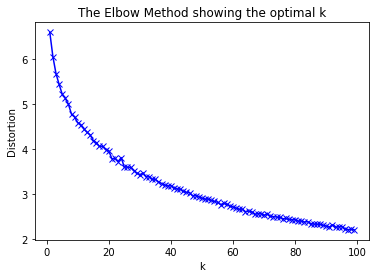

In [28]:
# 최적의 K 구하기
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
distortions = []
K = range(1,100)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(user_topics)
    kmeanModel.fit(user_topics)
    distortions.append(sum(np.min(cdist(user_topics, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / user_topics.shape[0])
#Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [29]:
y_kmeans = km.fit_predict(user_topics)
X = user_topics

In [30]:
# 사용자별 persona를 만들어보장
cols = ['topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8','topic9', 'topic10',
        'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16', 'topic17', 'topic18','topic19', 'topic20',
       'topic21', 'topic22', 'topic23', 'topic24', 'topic25', 'topic26', 'topic27', 'topic28','topic29', 'topic30',
        'topic31', 'topic32', 'topic33', 'topic34', 'topic35', 'topic36', 'topic37', 'topic38','topic39', 'topic40',
       'topic41', 'topic42', 'topic43', 'topic44', 'topic45', 'topic46', 'topic47', 'topic48','topic49', 'topic50',
        'topic51', 'topic52', 'topic53', 'topic54', 'topic55', 'topic56', 'topic57', 'topic58','topic59', 'topic60']
user_persona = pd.DataFrame(user_topics, columns=cols)
user_persona['persona'] = km.labels_
user_persona = user_persona.astype(int)
user_persona = user_persona.reset_index().rename(columns={'index': 'user'})

In [31]:
user_persona

,user,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,...,topic52,topic53,topic54,topic55,topic56,topic57,topic58,topic59,topic60,persona
0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,5,0,0,4
2,2,0,0,0,0,0,0,3,0,0,...,0,0,3,0,0,0,0,0,0,14
3,3,0,0,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,3
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,938,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
939,939,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,15
940,940,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
941,941,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,11


In [32]:
aa = user_persona['user'] + 1
user_persona['user_id'] = aa
user_persona = user_persona.drop('user', axis=1)

In [33]:
# 기존에 있는 u.data와 사용자 persona를 연결해준다.
user_profiles = pd.merge(movie_data, user_persona, how='left', on='user_id')

In [34]:
# 데이터 저장
user_profiles.to_csv("./files/mp_30.data", sep='|', index=False)

In [35]:
# 데이터 저장
user_persona.to_csv("./files/up_30.data", sep='|', index=False)

In [36]:
user_profiles = user_profiles.drop(['time','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9','topic10','topic11','topic12','topic13','topic14','topic15','topic16','topic17','topic18','topic19','topic20'], axis=1)

In [37]:
pickle.dump(km, open("./files/user_persona_30", "wb"))